<a href="https://colab.research.google.com/github/MohsenJadidi/ISLR/blob/master/Assignment1/Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 - Q5 (Regression model:)**
Statistical Learning Theory Course - Fall 2020 @ AUT

Author: MohammadMohsen Jadidi | email : mohsenjadidi@aut.ac.ir

# Part A

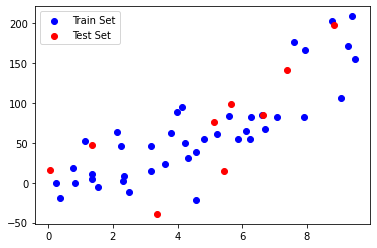

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,
           7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,
           0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,
           0.77,4.33]
Y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,
           84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,
           88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,
           51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]
X_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
Y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

fig = plt.figure(num=1)
ax = fig.add_subplot(1, 1, 1)
scatter1 = ax.scatter(x=X_train, y=Y_train, color='b', alpha=1, marker='o')
scatter2 = ax.scatter(x=X_test, y=Y_test, color='r', alpha=1, marker='o')
ax.legend(['Train Set', 'Test Set'])

# Part B

In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'